# 생선의 길이를 사용하여 무게를 예측

In [17]:
import numpy as np

In [18]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

### 길이와 무게를 산포도로 표현

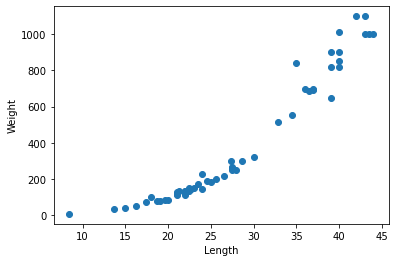

In [19]:
import matplotlib.pyplot as plt
plt.scatter(fish_length, fish_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [20]:
# Train Set, Test Set 분리
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(fish_length, fish_weight, random_state=42)

> KNN분류에서 사용되었던 stratify는 분류문제가 아니므로 사용하지 않는다.

In [21]:
train_data # 1차원 -> 머신러닝에는 2차원 데이터로 들어가야 하므로 reshape해줘야 한다.

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [22]:
# reshape
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

print(train_data.shape)
print(test_data.shape)

(42, 1)
(14, 1)


### 회귀모델 사용

In [25]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

model.fit(train_data, train_label)

KNeighborsRegressor()

In [26]:
# 모델 평가
model.score(test_data, test_label)

0.992809406101064

### 회귀모델은 분류모델처럼 예측값과 정답값을 비교할 수 없음(같기 어려움)
### 결정계수($R^2$): 평균 절대값 오차 사용

$R^2$ = 1 - $(타겟-예측)^2$ 의 합 / $(타겟-평균)^2$ 의 합

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_label, model.predict(test_data))

19.157142857142862

In [29]:
# 테스트 세트에 대한 예측
test_prediction = model.predict(test_data)

# 평균 절대값 오차 계산
mae = mean_absolute_error(test_label, test_prediction)
print(mae)

19.157142857142862


### 과대적합(Overfitting)과 과소적합(Underfitting)

In [30]:
# train data로 score 측정
model.score(train_data, train_label)

0.9698823289099254

In [31]:
# test data로 score 측정
model.score(test_data, test_label)

0.992809406101064

##### train더ㅣtest가 더 잘 마줌  > 과소적합
##### 보통은 train점수가 test점수보다 조금 다 잘 나온 과대적합 기준으로 분석한다

### KNN의 하이퍼 파라미터를 조절

In [32]:
# default 이웃 개수: 5. 이웃의 개수를 3으로 줄인다.
model.n_neighbors = 3

# 모델 재학습
model.fit(train_data, train_label)
print('train score: ' + str(model.score(train_data, train_label)))
print('test score: ' + str(model.score(test_data, test_label)))

train score: 0.9804899950518966
test score: 0.9746459963987609


---
# 이웃 갯수 조절 그래프 확인

In [36]:
knr = KNeighborsRegressor()

# 이웃의 개수를 조정해서 오차를 줄인다.(X좌표 5~45)
x = np.arange(5, 46)
print(x)
# 2차원으로 만들기
x = x.reshape(-1, 1)
print(x)


[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[[ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]]


k =  1
Train:  0.9852830341215901
Test:  0.991309195814175


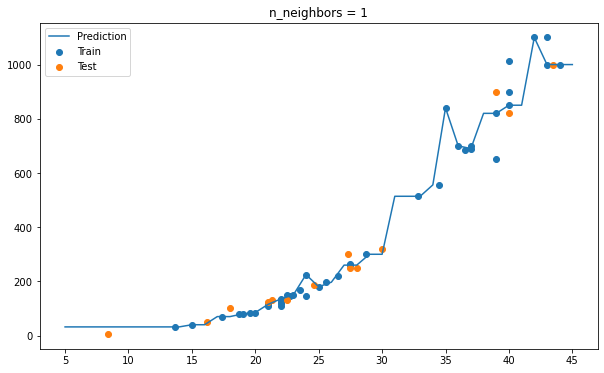

k =  3
Train:  0.9804899950518966
Test:  0.9746459963987609


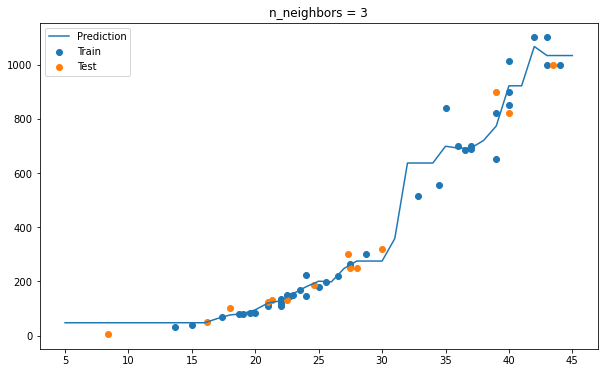

k =  5
Train:  0.9698823289099254
Test:  0.992809406101064


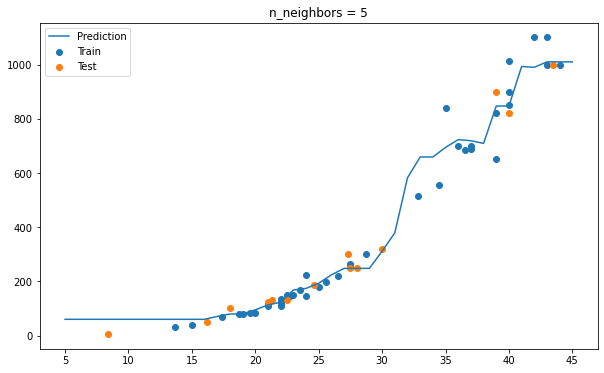

k =  10
Train:  0.96164569026043
Test:  0.9737908255822255


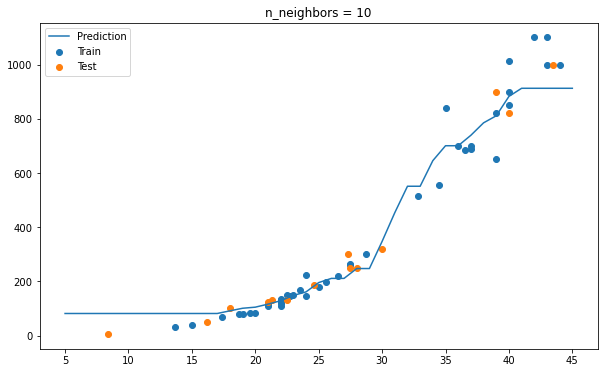

In [40]:
# n = 1, 3, 5, 10일때 예측 결과를 그래프로 그린다.
for n in [1, 3, 5, 10]:
    knr.n_neighbors = n
    knr.fit(train_data, train_label)

    print('k = ', n)
    print('Train: ', knr.score(train_data, train_label))
    print('Test: ', knr.score(test_data, test_label))

    # x엣 대한 예측 구하기
    prediction = knr.predict(x)

    # 훈련세트와 검증센트의 예측 결과 그래프 그리기
    plt.figure(figsize=(10, 6))
    plt.scatter(train_data, train_label, label='Train')
    plt.scatter(test_data, test_label, label='Test')
    plt.plot(x, prediction, label='Prediction')
    plt.legend()
    plt.title('n_neighbors = ' + str(n))
    plt.show()

# 과대적합 신호
- 과대적합되면 선이 train data를 완전 쫓아다님
- 선에서 조금이라도 벗어난 test data는 못 맞춤
- 적당히 중간값을 계산해서 어느정도 '일반화' 된 것이 좋음
- 과소적합보다는 조금 과대적합 된 것이 좋음